# Use Case 2: Comparing Clinical Attributes

## Step 1: Importing packages and setting up your notebook.

This use case will guide you through accessing and manipulating data from the clinical dataframe. We will explore how to retrieve clinical data, select variables for analysis, and represent interactions between those variables in a meaningful way. We will use endometrial cancer data from the CPTAC to will compare FIGO stage--a common measurement of uterine cancer stage (see the [NIH](https://www.cancer.org/cancer/endometrial-cancer/detection-diagnosis-staging/staging.html) for more information)--with BMI to see if there is any correlation.

We will start by importing the standard data analysis libraries, plus the seaborn library for visualization.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Our cancer data and a variety of accessory functions are provided in the cptac package.

In [2]:
import cptac
en = cptac.Ucec()

## Step 2: Getting data

We load the dataframe for clinical results by calling the `en.get_clinical()` method. We can then select the data for the variables we are interested in from the dataframe. To see what clinical attributes are available for analysis, we will print out the column names in the clinical dataframe.

In [3]:
clinical_data = en.get_clinical('mssm')
print(clinical_data.columns)

Index(['tumor_code', 'discovery_study',
       'discovery_study/type_of_analyzed_samples', 'consent/age',
       'consent/sex', 'consent/race', 'consent/ethnicity',
       'consent/ethnicity_race_ancestry_identified',
       'consent/collection_in_us', 'consent/participant_country',
       ...
       'follow-up/additional_treatment_for_new_tumor_radiation',
       'follow-up/additional_treatment_for_new_tumor_pharmaceutical',
       'follow-up/additional_treatment_for_new_tumor_immunological',
       'follow-up/days_from_date_of_initial_pathologic_diagnosis_to_date_of_additional_surgery_for_new_tumor',
       'follow-up/cause_of_death',
       'follow-up/days_from_date_of_initial_pathologic_diagnosis_to_date_of_death',
       'Recurrence-free survival', 'Overall survial',
       'Recurrence status (1, yes; 0, no)',
       'Survial status (1, dead; 0, alive)'],
      dtype='object', name='Name', length=113)


## Step 3: Organizing the data

For this use case, we are primarily interested in the 'days from date of initial pathologic diagnosis to date of death' and 'age' of patients.

In order to facilitate our analysis, we will convert the 'days from date of initial pathologic diagnosis to date of death' into years. This will allow us to make a more direct comparison with the 'age' of the patients, which is typically measured in years.

The following section of code creates a function to convert the 'days from date of initial pathologic diagnosis to date of death' into years and adds a new column to the dataframe with this adjusted time period.

In [4]:
def convert_days_to_years(row):
    if pd.isnull(row['follow-up/days_from_date_of_initial_pathologic_diagnosis_to_date_of_death']):
        return np.nan
    else:
        return row['follow-up/days_from_date_of_initial_pathologic_diagnosis_to_date_of_death'] / 365.25

# Applying the function to the dataframe
clinical_data['years_from_diagnosis_to_death'] = clinical_data.apply(convert_days_to_years, axis=1)


## Step 4: Plot the data

The 'age' at diagnosis is continuous and 'years from diagnosis to death' is also continuous, so we can use a scatter plot to see the relationship between the patient's age at the time of diagnosis and the number of years they lived post-diagnosis.

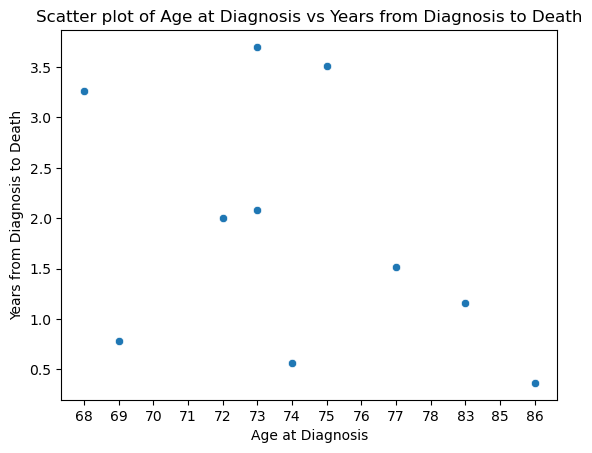

In [5]:
clinical_data = clinical_data.sort_values('consent/age')

sns.scatterplot(data=clinical_data, x='consent/age', y='years_from_diagnosis_to_death')
plt.title('Scatter plot of Age at Diagnosis vs Years from Diagnosis to Death')
plt.xlabel('Age at Diagnosis')
plt.ylabel('Years from Diagnosis to Death')
plt.show()

Another way of viewing this same data is a boxplot. In this example, we add a strip plot over the box plot to visualize each datapoint on top of the boxplot.

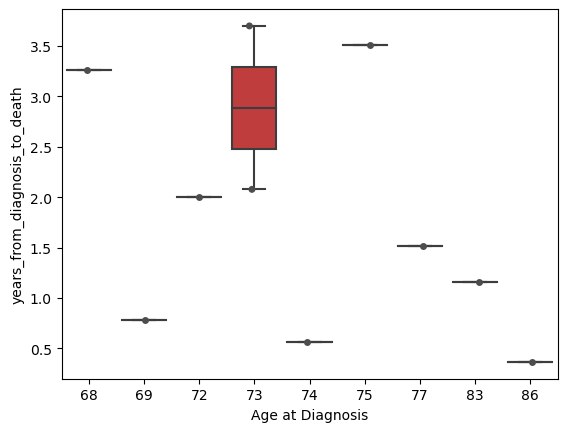

In [9]:
clinical_data['consent/age'] = pd.to_numeric(clinical_data['consent/age'], errors='coerce')

clinical_data_filtered = clinical_data.dropna(subset=['years_from_diagnosis_to_death', 'consent/age'])

clinical_data_sorted = clinical_data_filtered.sort_values('consent/age')

figoStrip = sns.boxplot(data=clinical_data_sorted, x="consent/age", y="years_from_diagnosis_to_death", showfliers=False)
figoStrip = sns.stripplot(data=clinical_data_sorted, x="consent/age", y="years_from_diagnosis_to_death", jitter=True, color=".3")
figoStrip.set(xlabel = "Age at Diagnosis")
plt.show()



## Step 5: Plot other data

Let's apply the same technique to visualize different variables in this dataset. For example, we can create a similar visualization to examine the correlation between ethnicity and recurrence-free survival. First, we need to select these variables of interest from the clinical dataframe, then we can plot the resulting dataframe using the seaborn package.

C:\Users\sabme\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


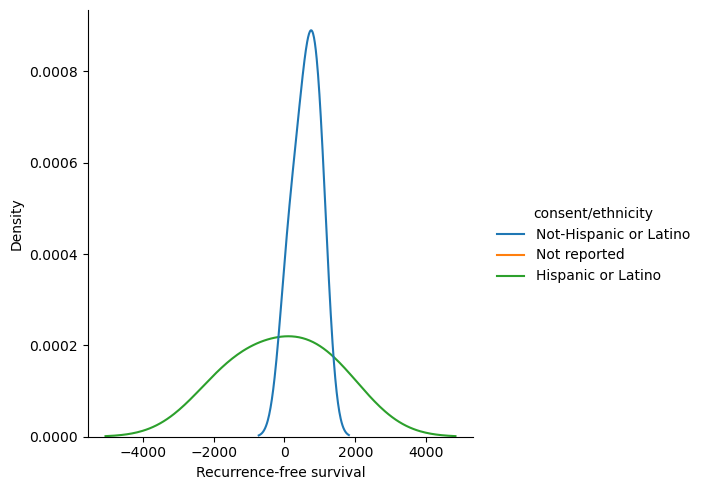

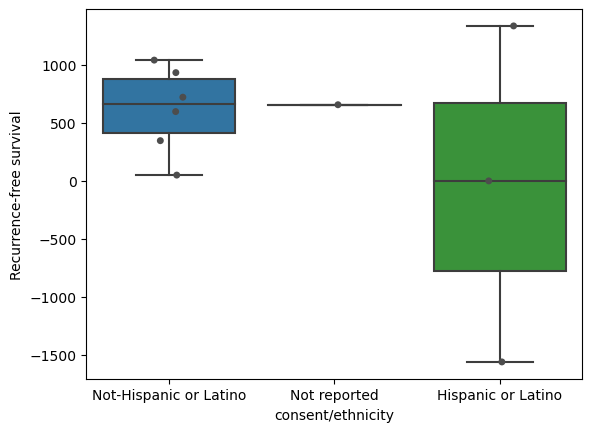

In [12]:
# Select relevant columns
ethnicity_survival = clinical_data[['consent/ethnicity', 'Recurrence-free survival']]

# Generate a histogram
sns.displot(ethnicity_survival[ethnicity_survival['consent/ethnicity'] != "Unknown"], x="Recurrence-free survival", hue="consent/ethnicity", kind="kde", common_norm=False)
plt.show()

# Generate a boxplot
ethnicity_survival_plot = sns.boxplot(data=ethnicity_survival, x="consent/ethnicity", y="Recurrence-free survival", showfliers=False)
ethnicity_survival_plot = sns.stripplot(data=ethnicity_survival, x="consent/ethnicity", y="Recurrence-free survival", jitter=True, color=".3")
plt.show()